In [49]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys
sys.path.insert(0, '/extenciones')
from extenciones import Utils2 as ut

In [ ]:

data = ut.load_from_csv( ut , "churn_exploratorio.csv")
data.head(2)

In [57]:
dataEXP = data.copy(deep = True)

In [68]:
dataexp = dataEXP.drop(columns = ["Unnamed: 0"])

In [71]:
dataexp = pd.get_dummies(dataexp ,columns = ["Paperless Billing","Internet Service", "Streaming Movies"] , drop_first= False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3700\3506525637.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataexp.corr()['Churn Value'].sort_values(ascending=True).plot(


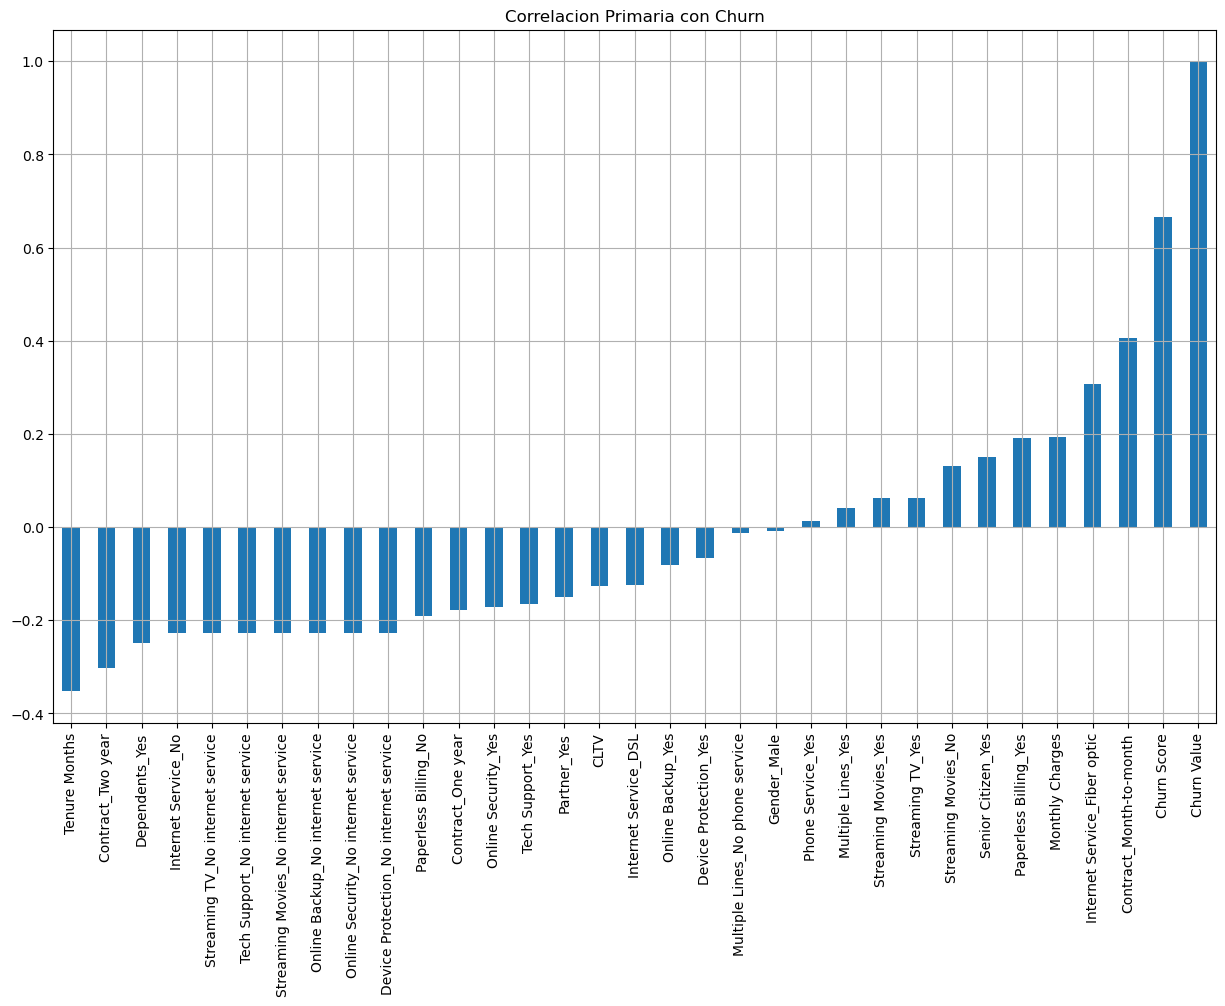

In [84]:
fig = plt.figure(figsize=(15,9))
# que tan correlacionados estan con el churn de manera asendente ordenada de tipo barra 
dataexp.corr()['Churn Value'].sort_values(ascending=True).plot(
    kind='bar',
    grid=True ,
    title= "Correlacion Primaria con Churn",
    #rot=True,

    )
plt.show()

# Correlaciones a primera vista:

Retencion
    
    -Las variables relacionadas con altas niveles de tiempo estan negativamente correlacionads con el churn, o lo que es igual, positivamente corelacionads con la retencion de clientes: 
    tales como los contratos largos 
    
    -Tener dependientes: podemos analizar cual es el numero de dependientes clave para la retención
    
    -Las personas que no tienen servicio de Internet y que no tienen servicios extras - 
    
    -En general a las personas a las que no se les ha tenido que dar soporte tecnico


Churn
    
    -Las personas que contratan en plazos de mes a mes, tienen mayor posibilidad = .41
    
    -El servicio de fibra optica esta corelacionado negativamente .36
    
    -los cargos mensuales = .19
    
    -Asi como las personas que elijen facturar sin papel: podemos encontrar un causal detonante = .19
    
    -Si las personas tienen mas de 65 años = .17

# Analisis de variables unicas 

In [140]:
lista_rapida = [
"Tenure Months",
"Payment Method",
"Senior Citizen_Yes",
"Gender_Male",
"Dependents_Yes",
"Phone Service_Yes",
"Multiple Lines_Yes",
"Online Security_Yes",
"Online Backup_Yes",
"Tech Support_Yes",
"Streaming TV_Yes",
"Contract_One year",
"Contract_Two year",
"Paperless Billing_Yes"
"Internet Service_DSL",
"Internet Service_Fiber optic",
"Internet Service_No",
"Streaming Movies_Yes",
"Streaming Movies_No internet service",
]

In [252]:
plotvolteado = ["Churn Reason"]

In [138]:
def plot_categorialX(column):
    fig = plt.figure(figsize=(10,10))
    
    sns.countplot(data=dataexp, x=column, hue='Churn Value',
    )
    plt.show()

In [250]:
def plot_categorialY(column):
    fig = plt.figure(figsize=(10,15))
    
    sns.countplot(data=dataexp, y=column, hue='Churn Value',
    palette="tab10"
    )
    plt.show()

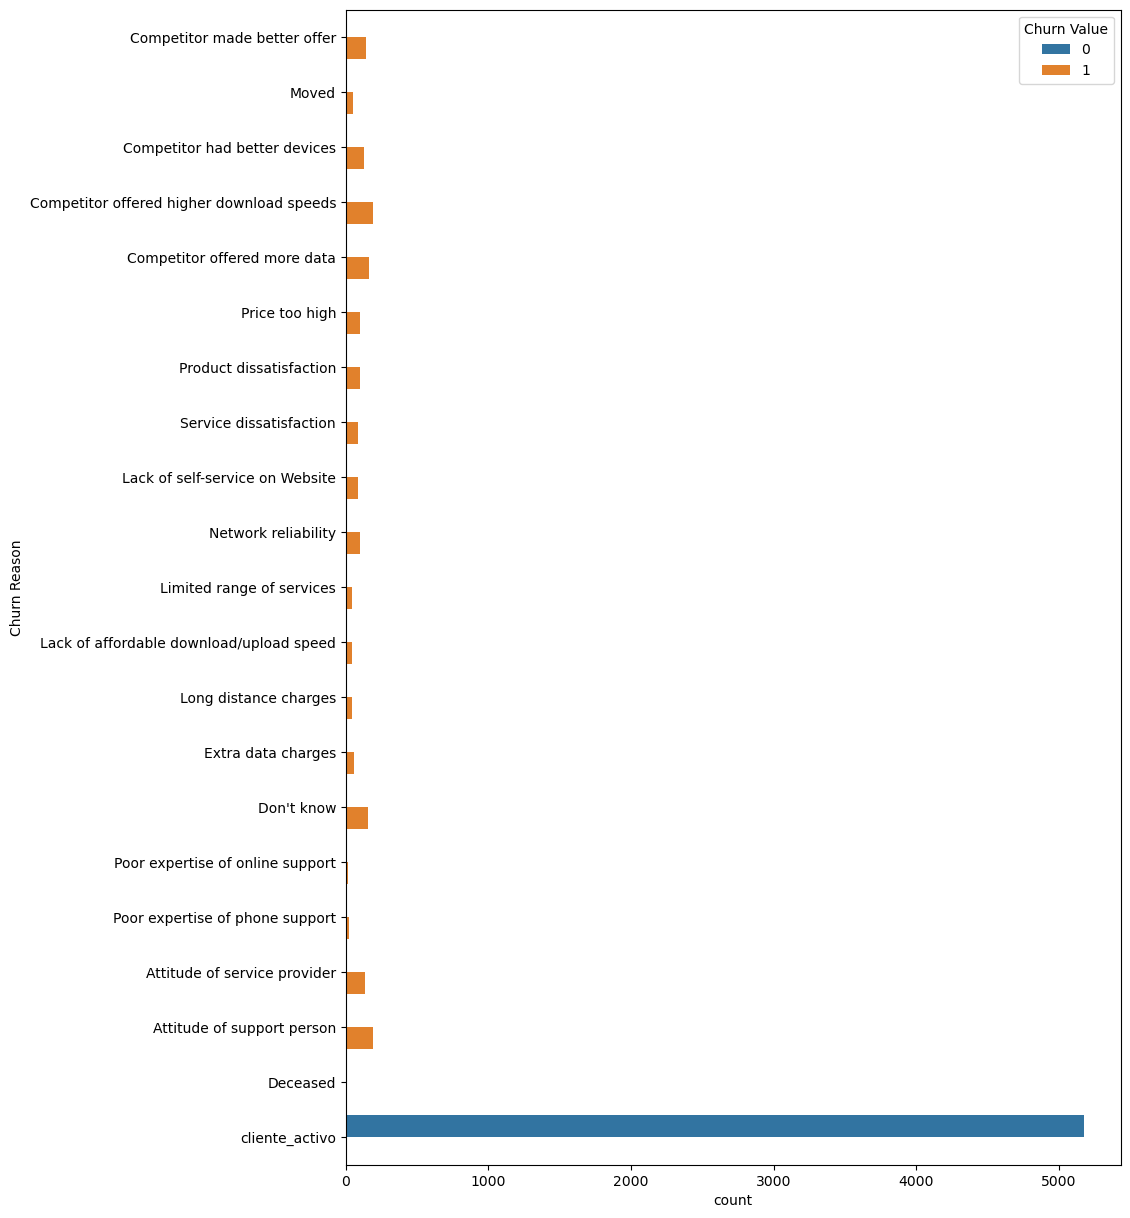

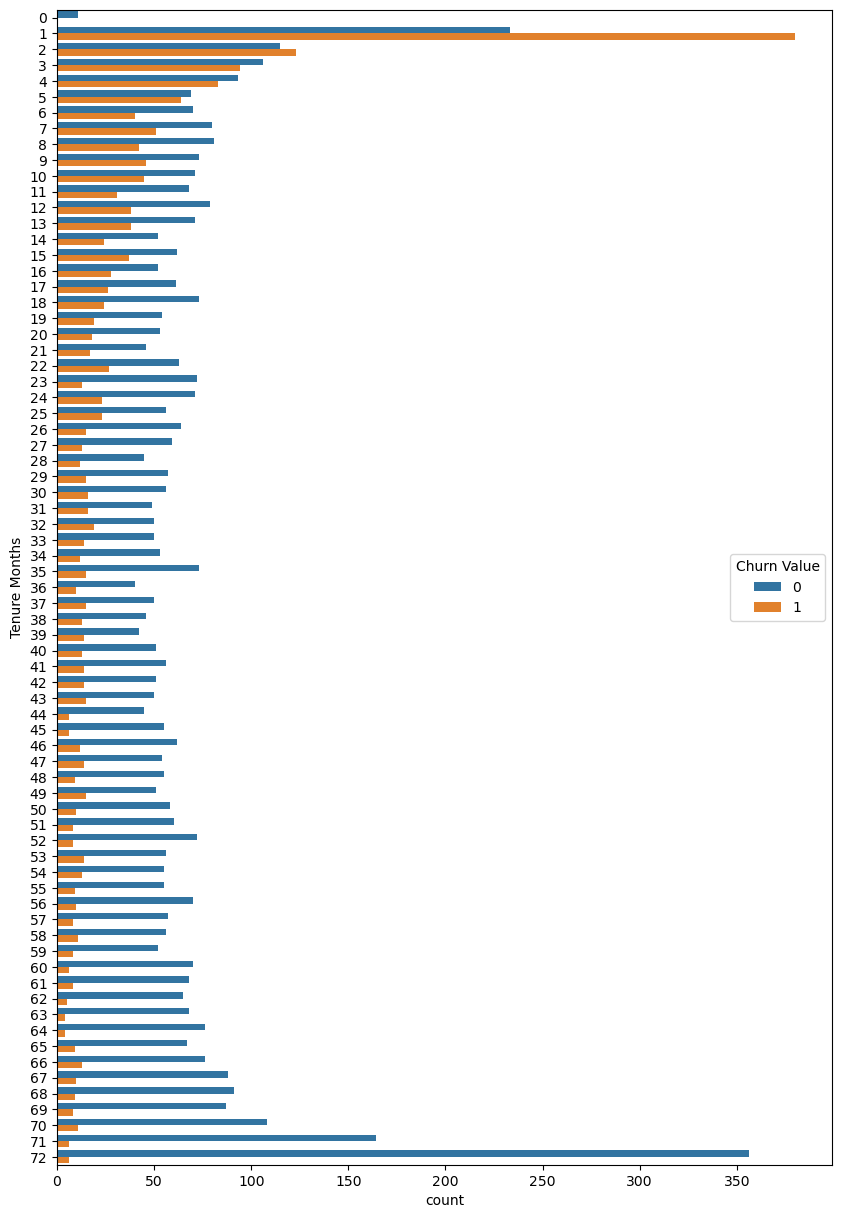

In [251]:
for var in plotvolteado:
    plot_categorialY(var)

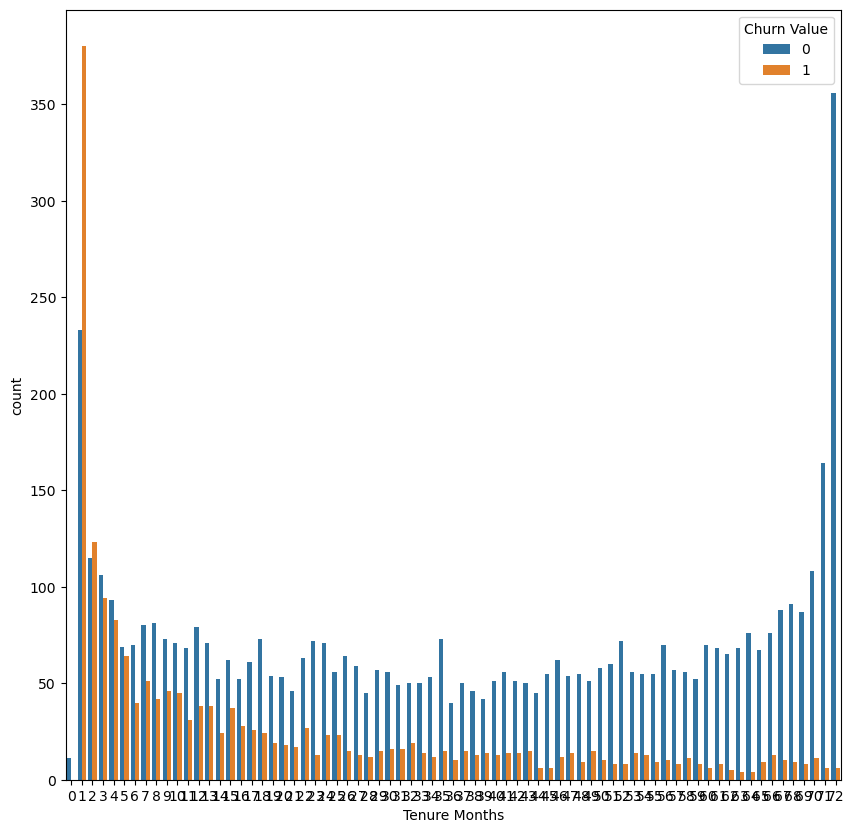

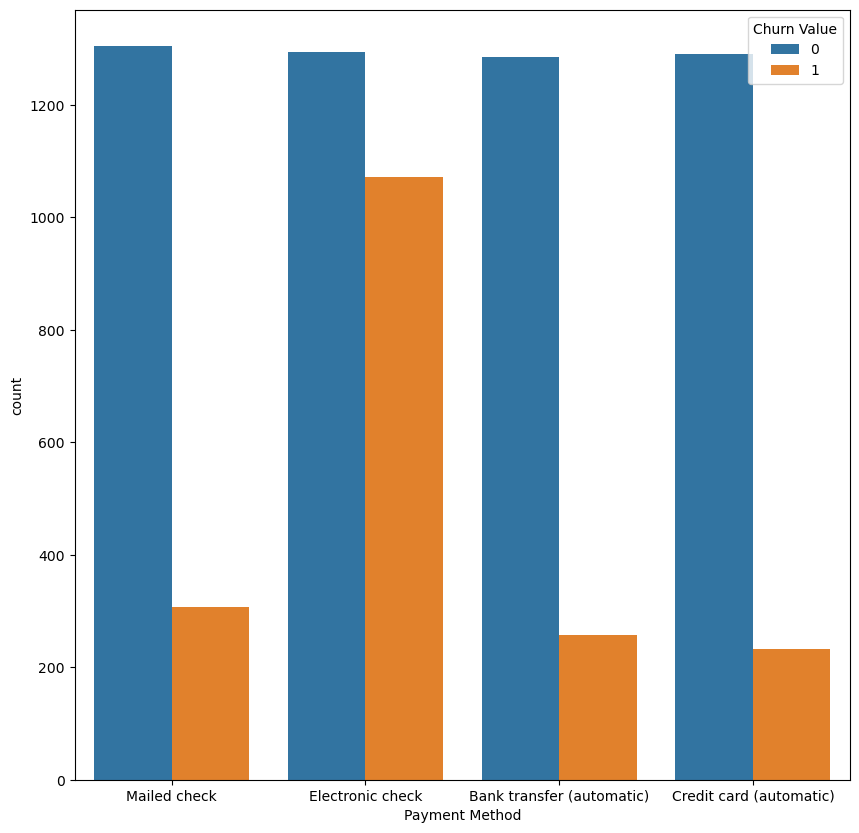

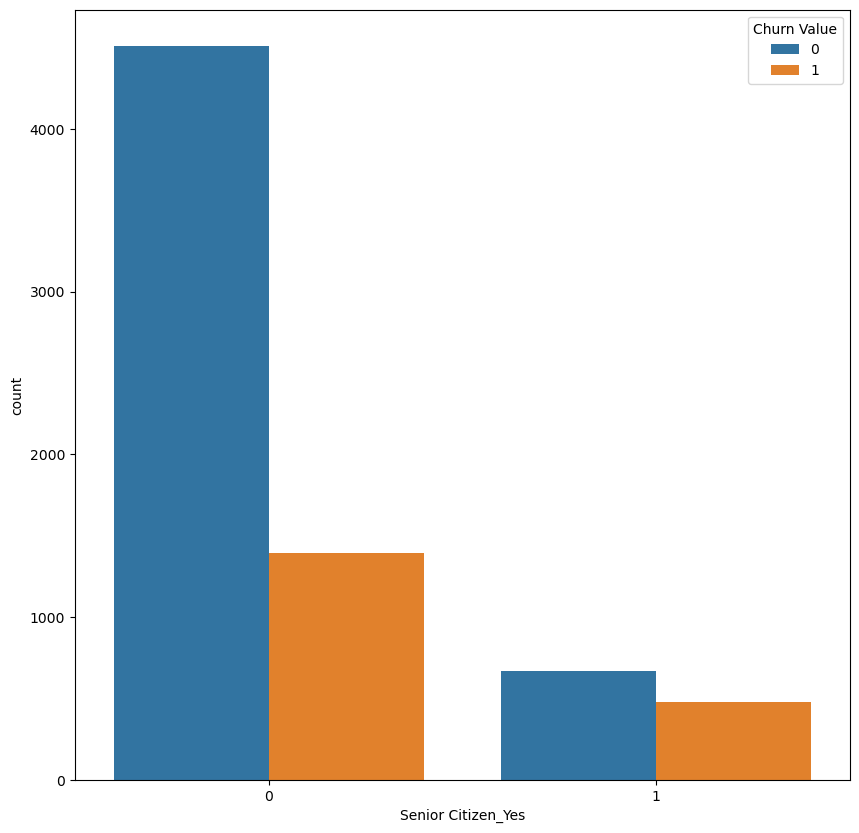

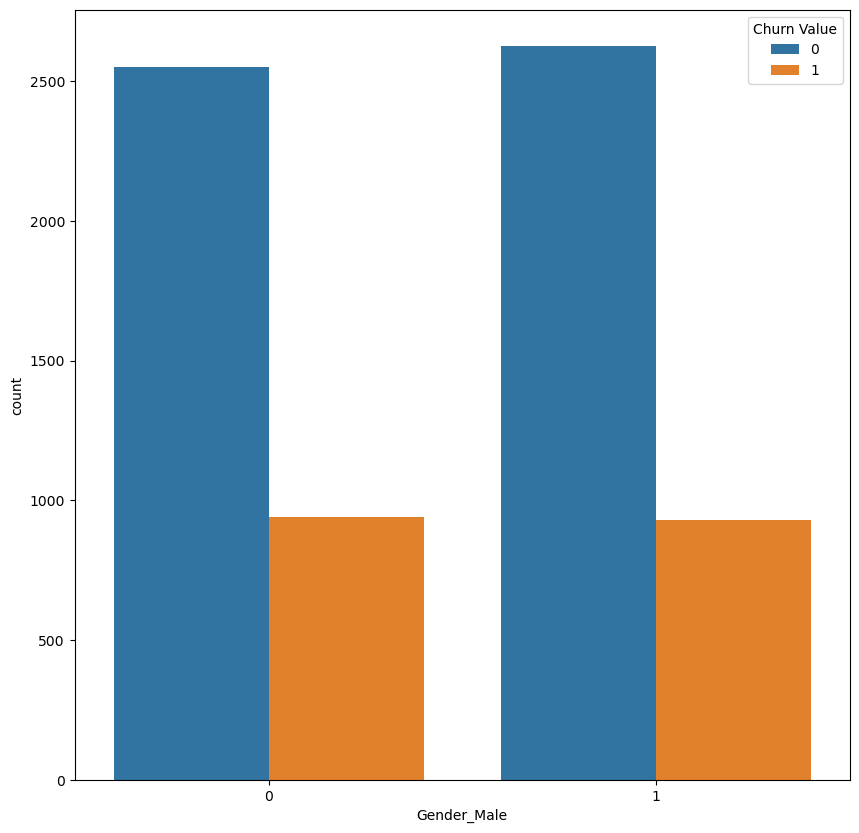

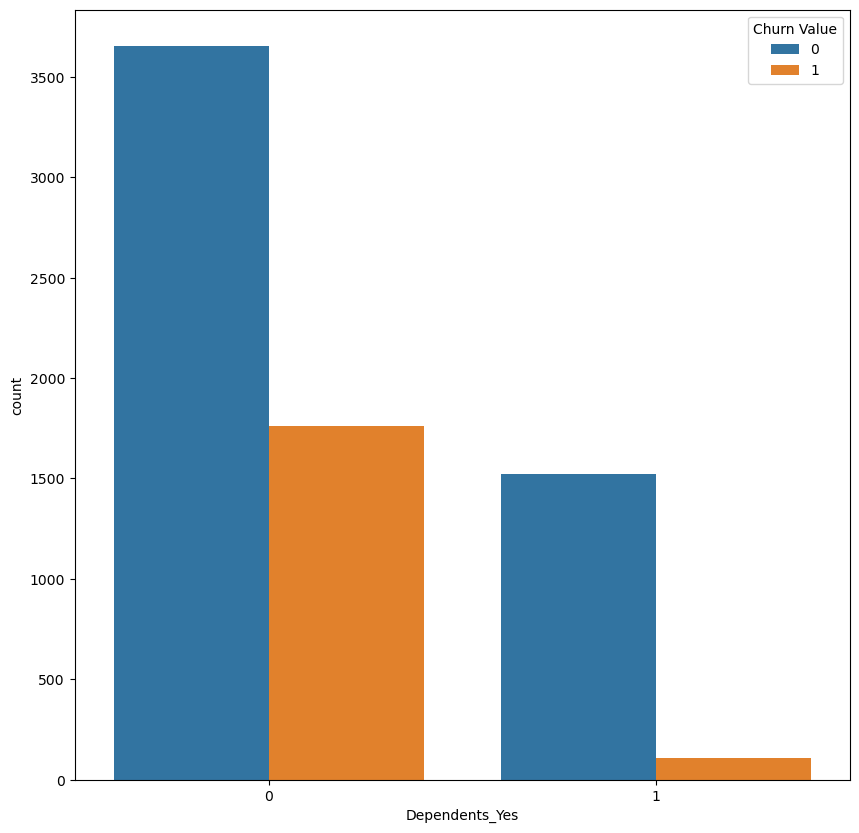

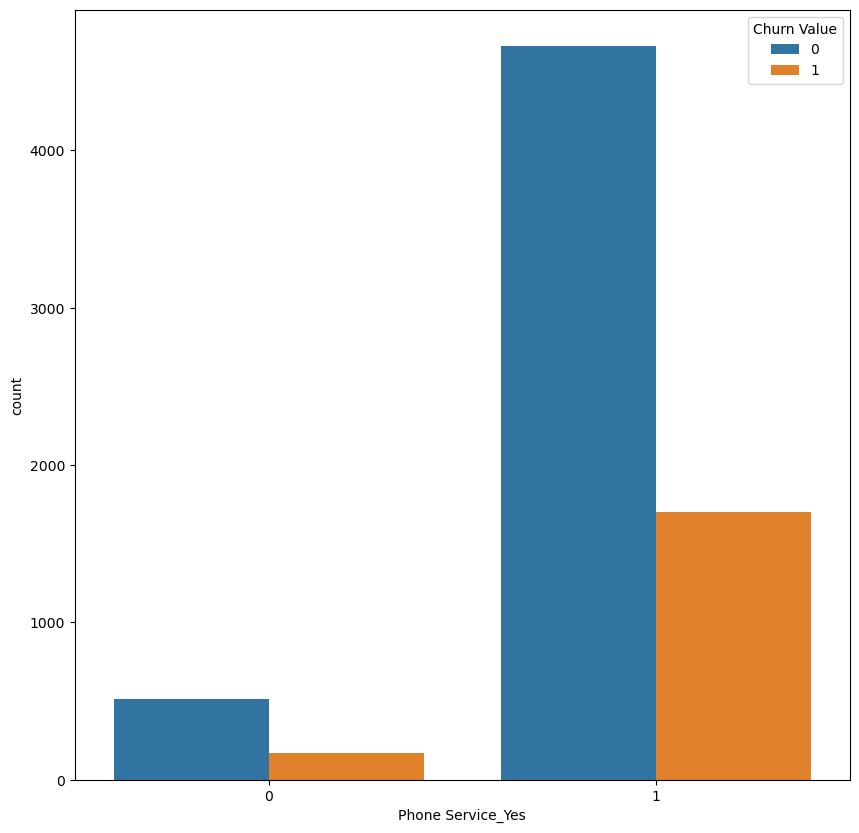

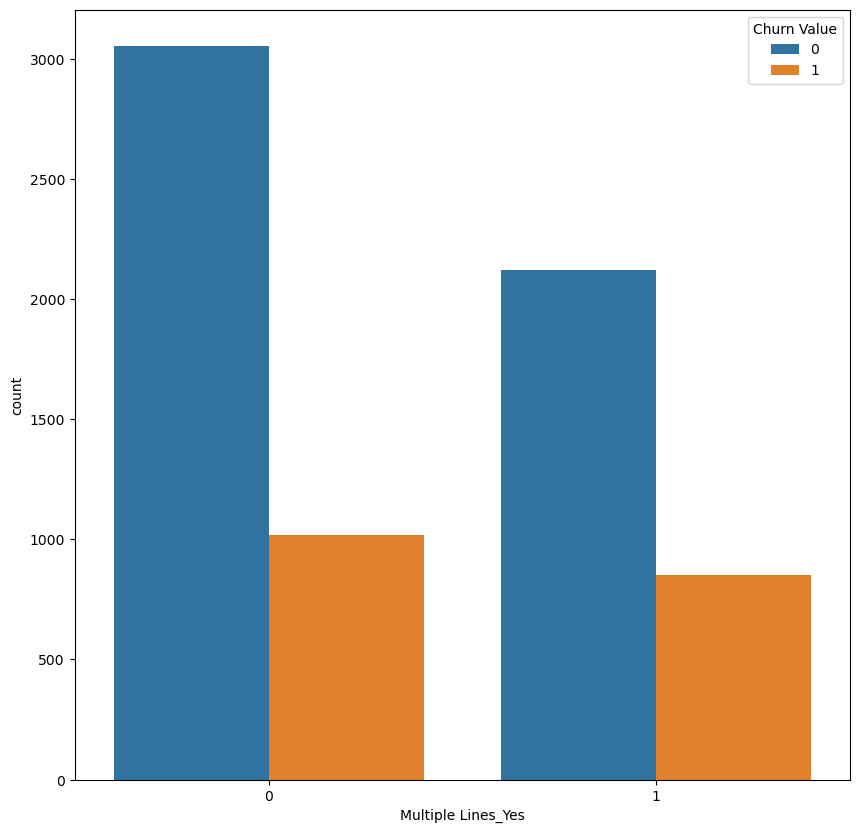

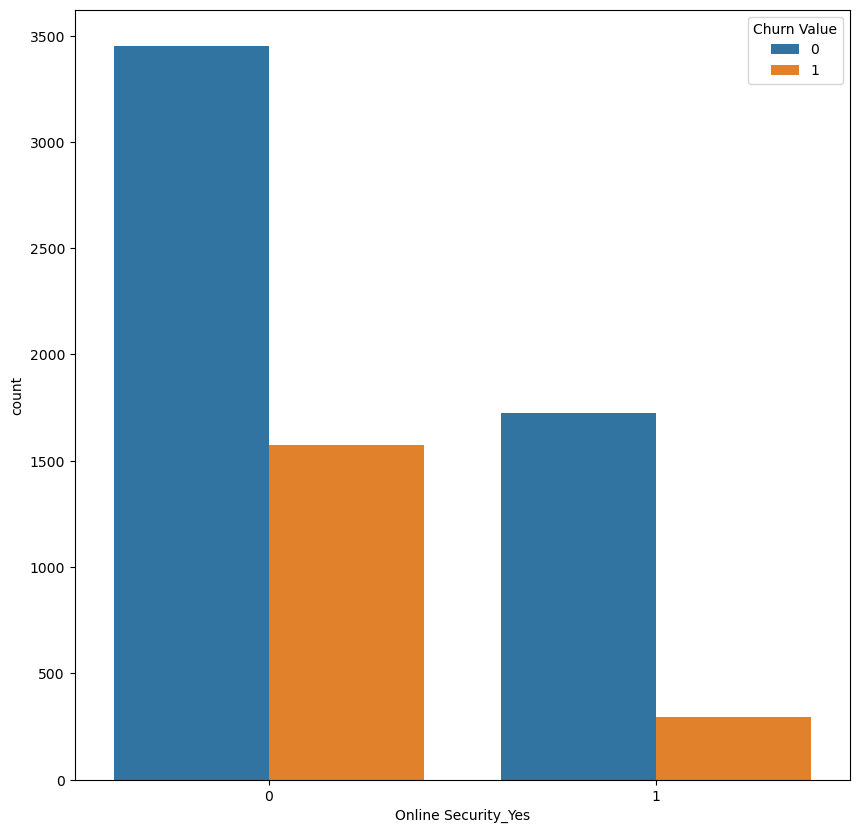

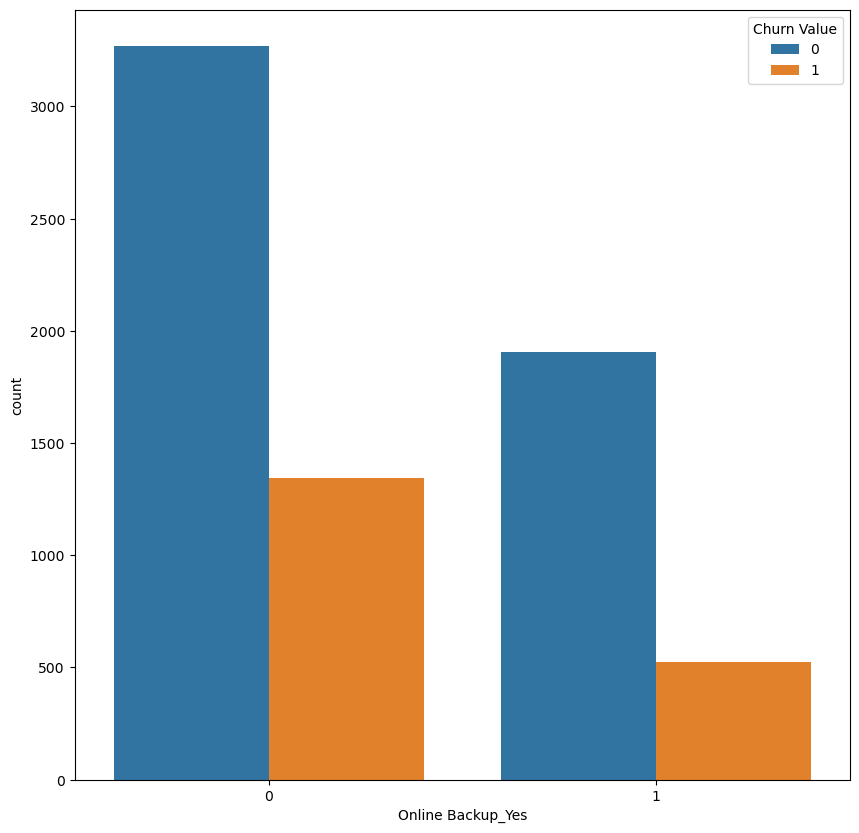

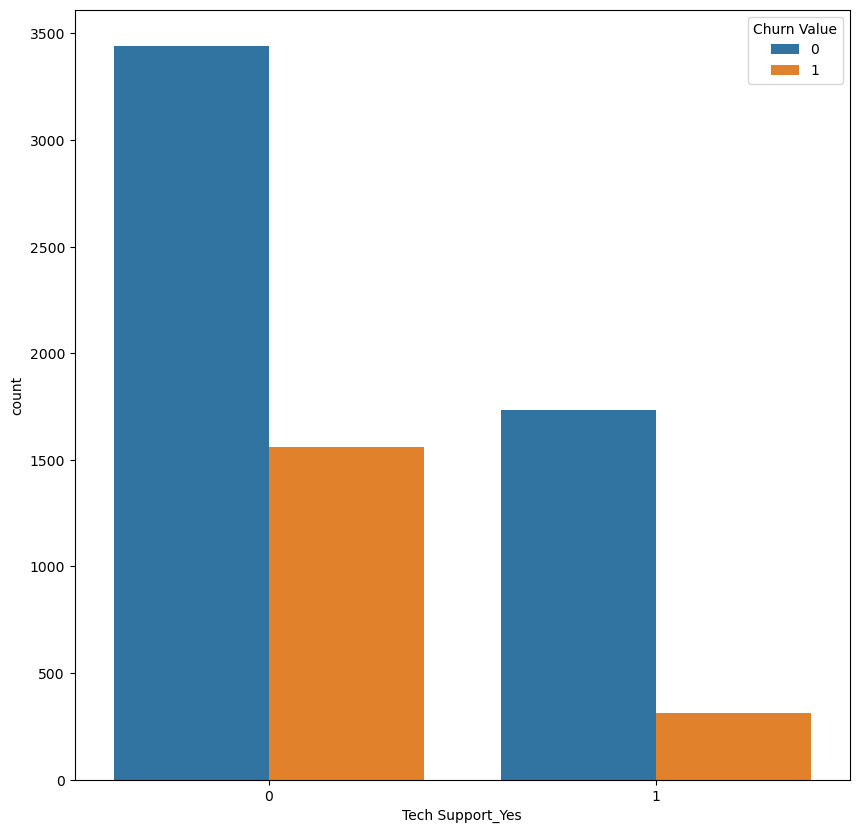

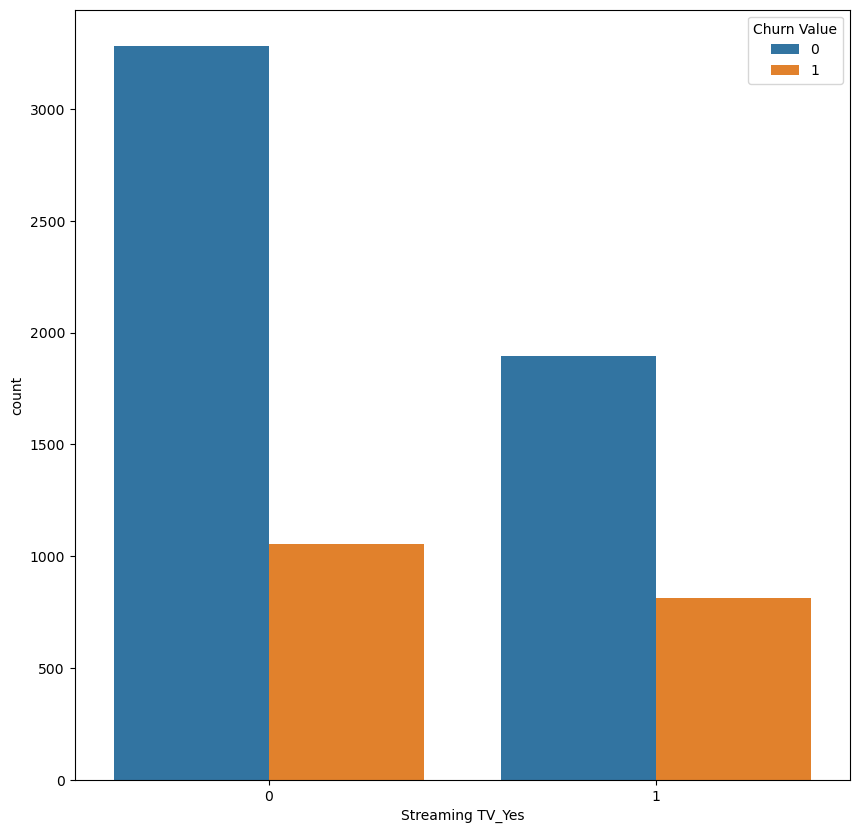

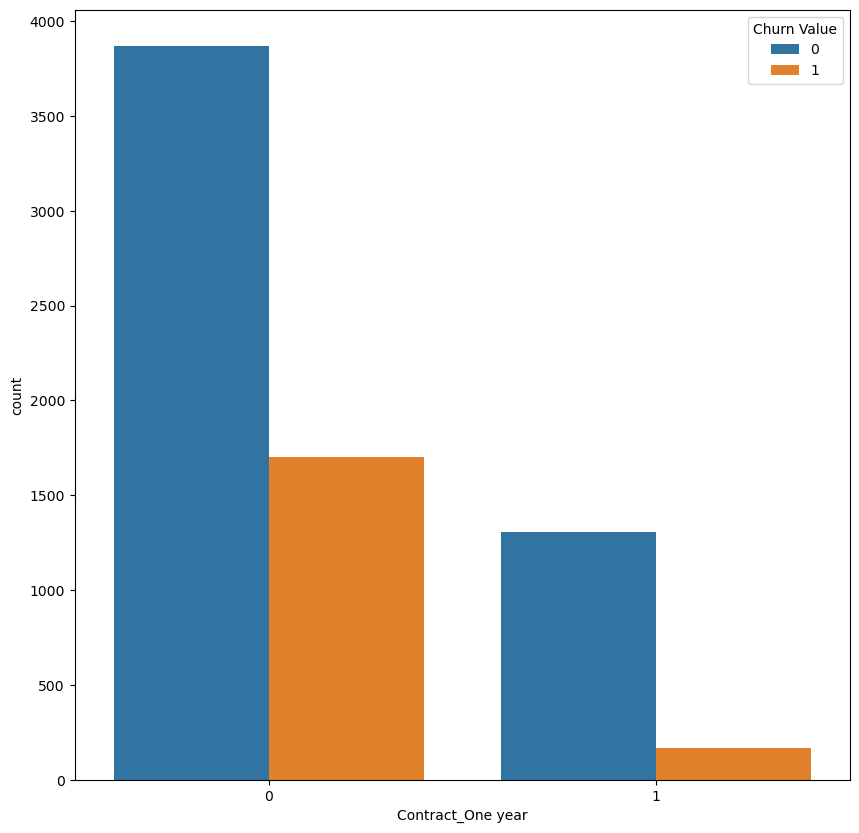

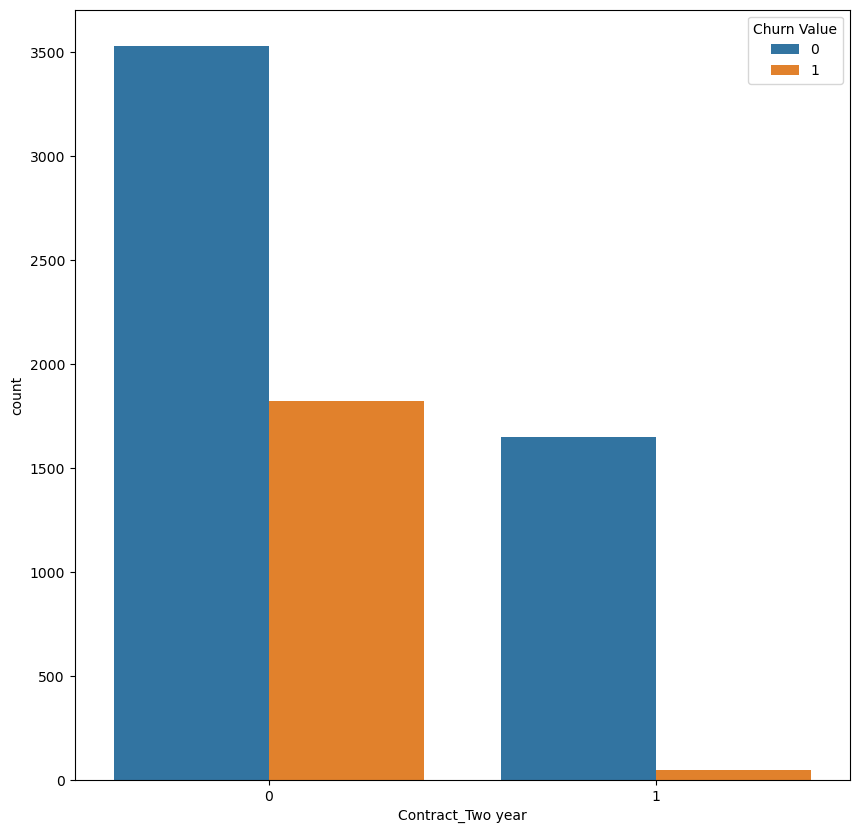

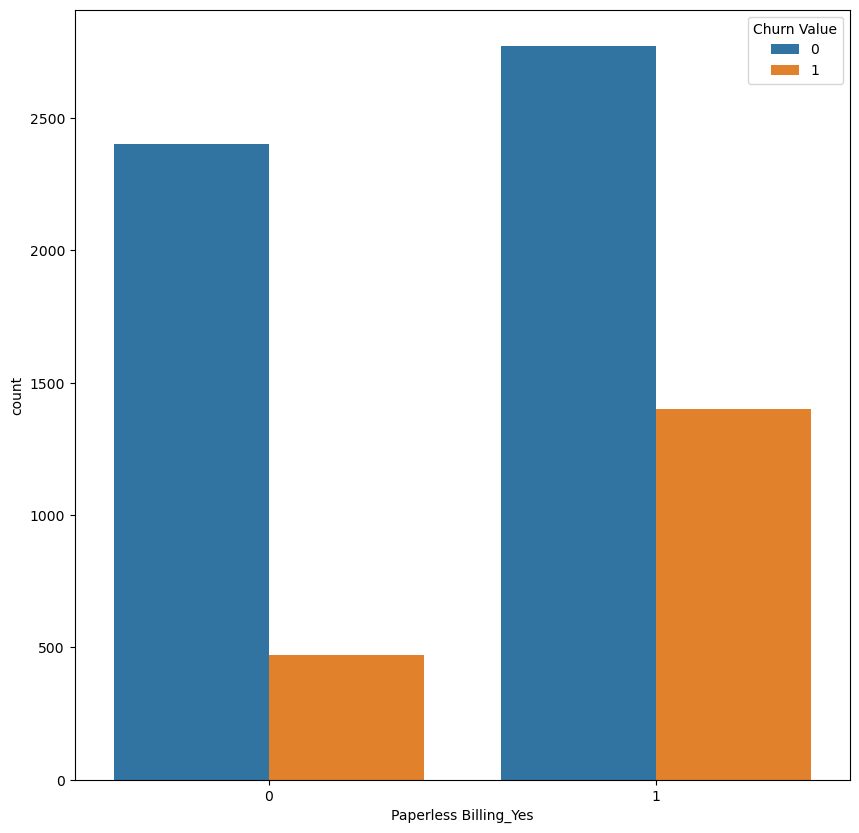

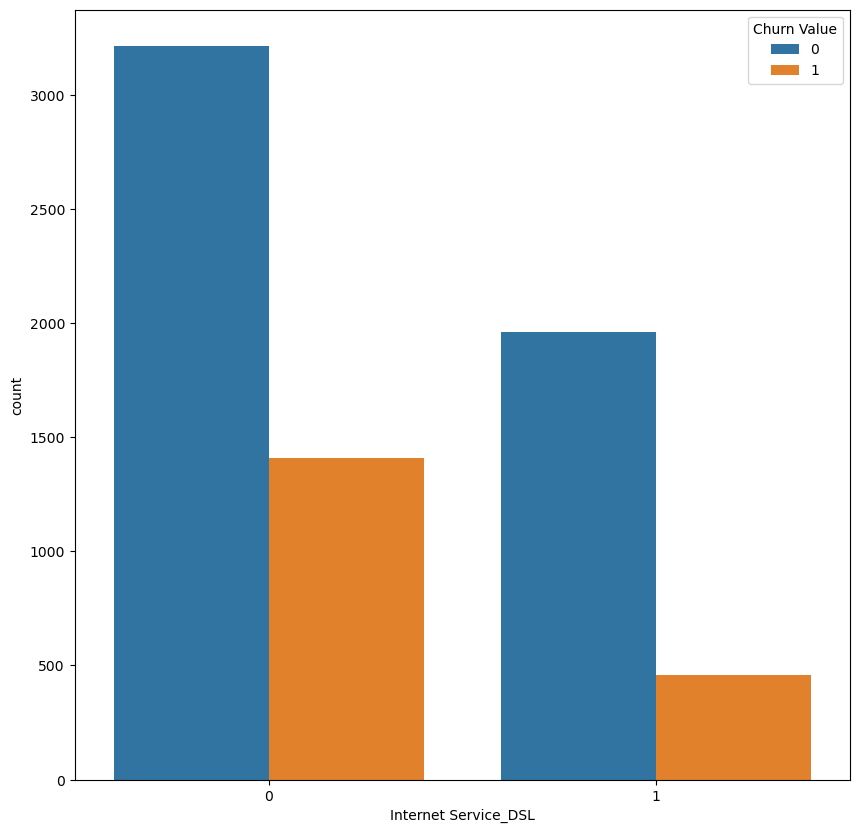

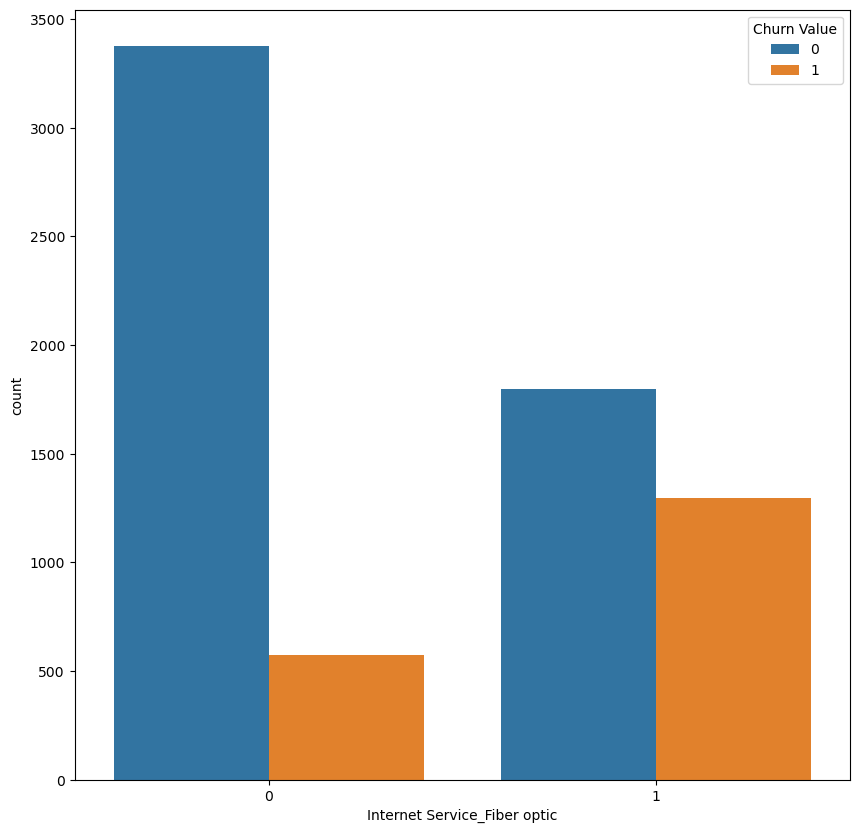

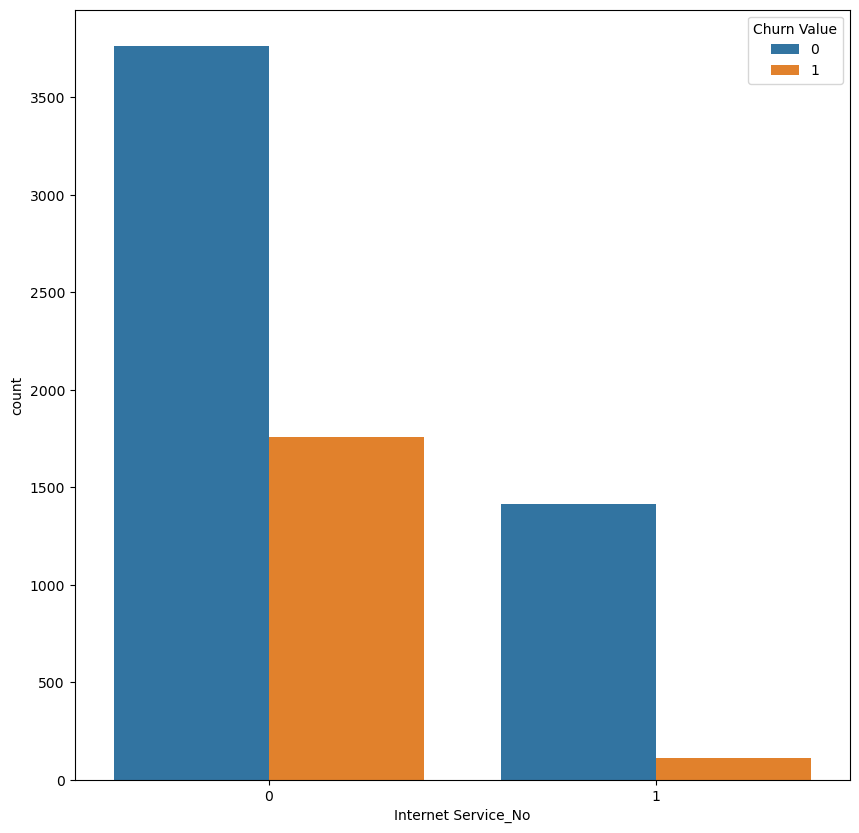

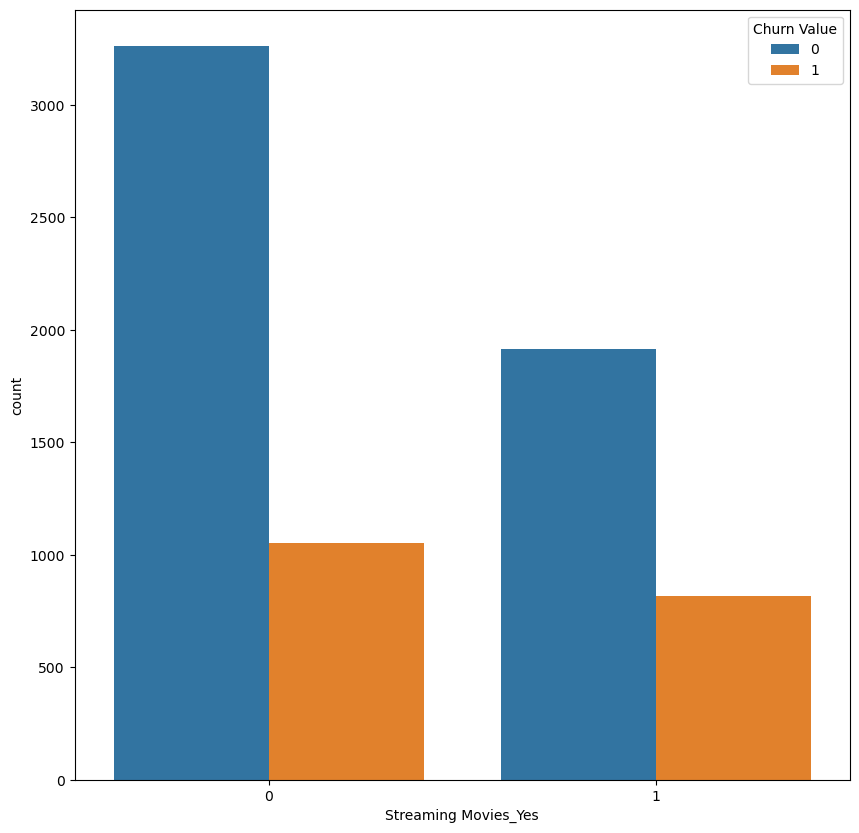

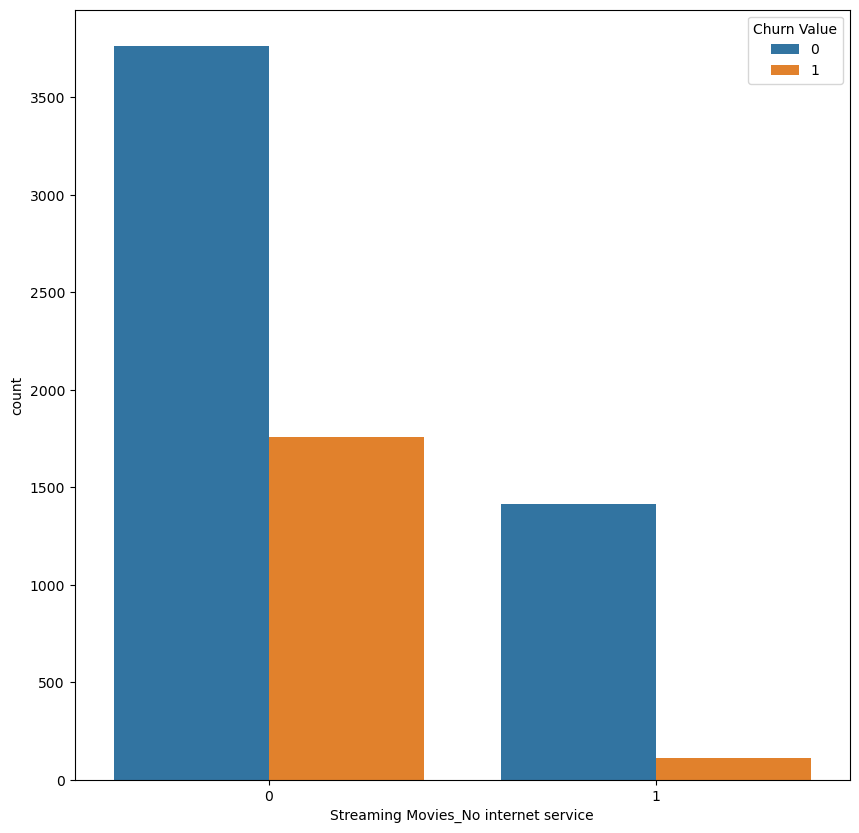

In [141]:
# guardamos las columnas categoricas con la funcion . select_dtypes en donde todas las que son de tipo objeto se guardaran
#columnas_categoricas = dataexp.select_dtypes(include='int64' ).columns
# pasale al parametro de la funcion las columnas iteradas  

#columnas_plot = ["Gender_Male"]
for var in lista_rapida:
    plot_categorialX(var)

<Figure size 5000x1000 with 0 Axes>

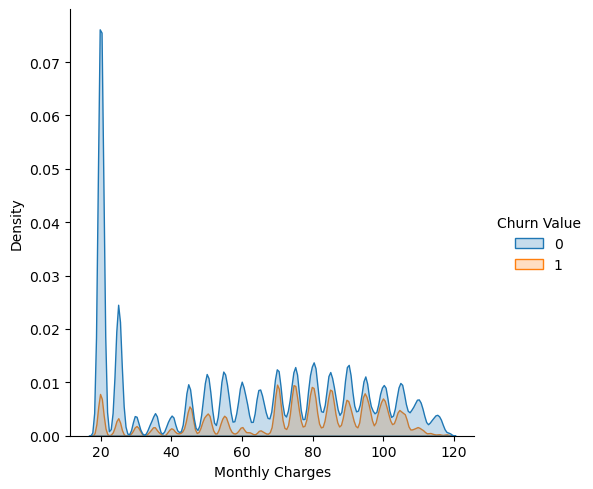

<Figure size 5000x1000 with 0 Axes>

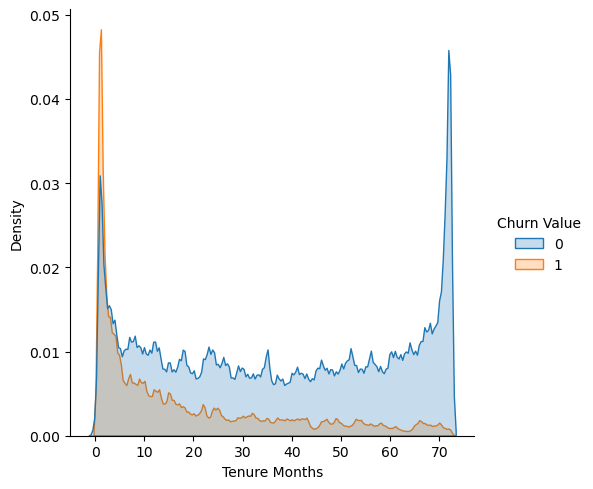

In [253]:
def plot_categorialSpecial(column):
    fig = plt.figure(figsize=(50,10))
    
    sns.displot(data=dataexp, x=column, 
    #col='Churn Value', 
    #bins=120, 
    fill = True,
    #multiple="stack",
    hue= "Churn Value",
    kind="kde", 
    bw_adjust=.1
    )
    plt.plot(grid= True)
    plt.show()
lista_densa = ["Monthly Charges","Tenure Months", ]
for var in lista_densa:
    plot_categorialSpecial(var)

Primeras impresiones 